# Exercises

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle`
- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting singal.
  Try and fix a central frequency and play with the width of the band, then try to change the central frequency of the band.
- Try to change the order of the filter, for a fixed frequency band. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic commeand [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- Comment on what you see

## Answers
Below, the code is given for all exercises. First, I tried filtering the signals for different bandth widths, centered around the same frequency. It is evident that for small bandwidths, a small range of frequencies is visible, causing the signal to be more "smooth". This is especially visible in the 40-60 Hz signal. As the width increases, more peaks start to occur which causes the signals to be more spiky. \
After that, the same bandwith is used, but centered around different frequencies. As expected, the different signals all remain "smooth" but they only differ in their frequency, since the center frequency differs. \
As for the order of the filters, I plotted the time series for different orders (2,5,10,20). There is no clear visible difference, the only evident difference is that of the computation time. The computation times were 0.01107600000000275
,0.011167999999997846 ,0.01577599999999535 and 0.03256199999999865 respectively. As expected, the computation time increases as a function of filter order.



In [3]:
#import data
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
sys.path.append('../../AchimBrinkop/Neuro-Analysis/01-local_field_potential/code/')
import lfp_functions as lf
from utils import download_data
from scipy.signal import butter
from scipy.signal import sosfilt
from time import process_time

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})

with open('../../AchimBrinkop/Neuro-Analysis/01-local_field_potential/data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


### FPB comments 
you have to import from `utils`, not `code.utils`

Text(0, 0.5, 'voltage (mV)')

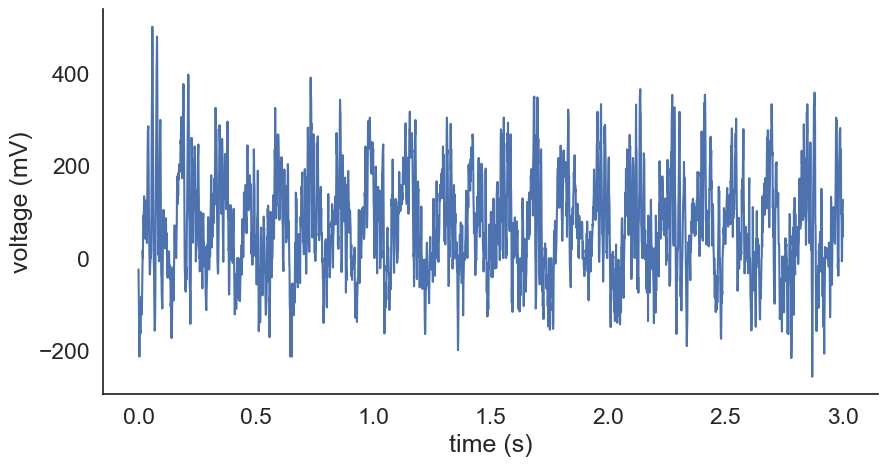

In [4]:
#plot 3s of data
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,3,3000),lfp[:3000])
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')

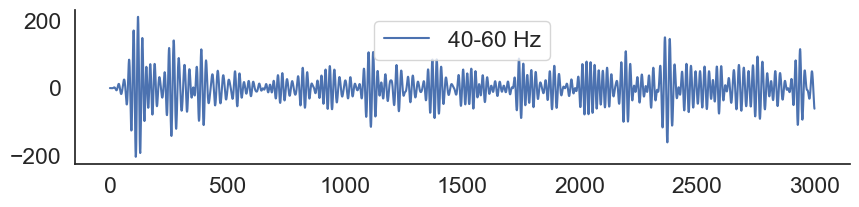

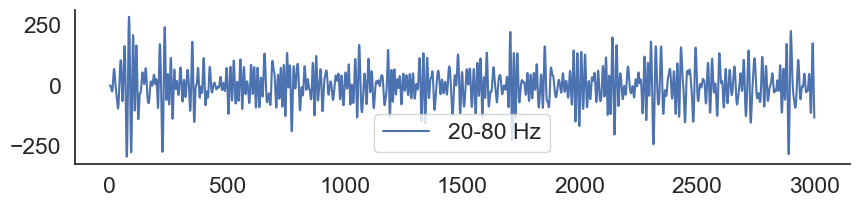

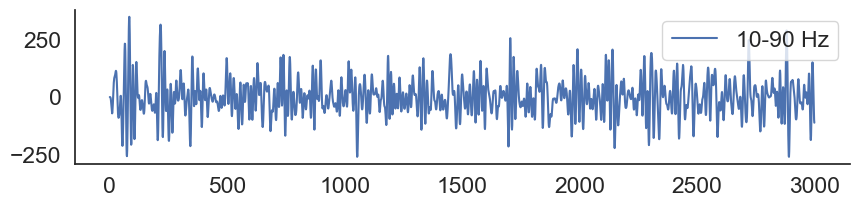

In [5]:
#apply filter in different frequency bands
#first, same central frequency but different band widths. Central frequency = 50 Hz

filter_order = 5
low_f = 1
high_f = 10

filter = butter(filter_order,[low_f,high_f],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
                    
filter1 = lf.bandpass_filter(lfp,low_f=40,high_f=60, sampling_rate=sampling_rate)
filter2 = lf.bandpass_filter(lfp,low_f=20,high_f=80, sampling_rate=sampling_rate)
filter3 = lf.bandpass_filter(lfp,low_f=10,high_f=90, sampling_rate=sampling_rate)

plt.figure(figsize=(10,2))
plt.plot(filter1[:3000],label='40-60 Hz')
plt.legend()

plt.figure(figsize=(10,2))
plt.plot(filter2[:3000],label = '20-80 Hz')
plt.legend()

plt.figure(figsize=(10,2))
plt.plot(filter3[:3000],label = '10-90 Hz')
plt.legend()

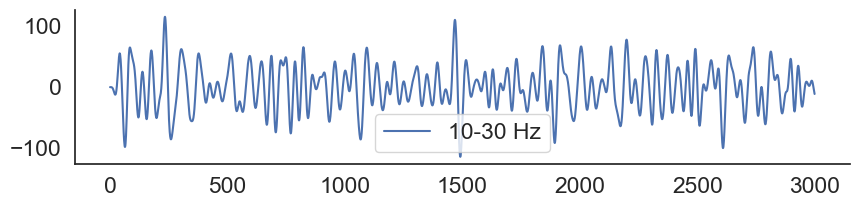

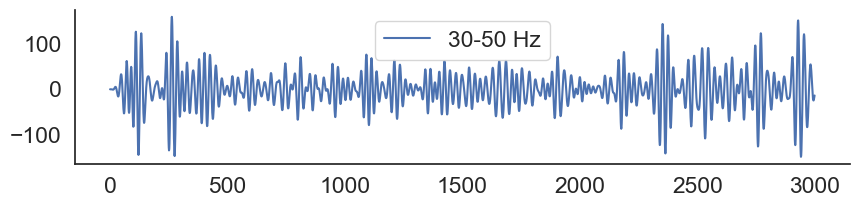

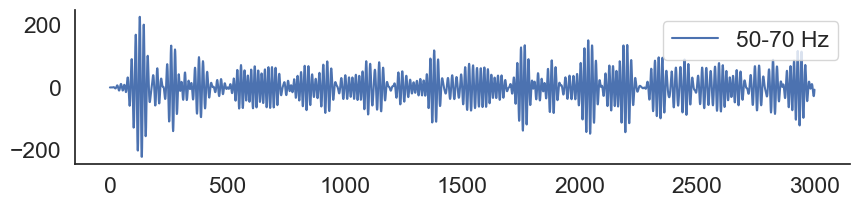

In [6]:
#now, different centered frequencies but the same band widths
filter1 = lf.bandpass_filter(lfp,low_f=10,high_f=30, sampling_rate=sampling_rate)
filter2 = lf.bandpass_filter(lfp,low_f=30,high_f=50, sampling_rate=sampling_rate)
filter3 = lf.bandpass_filter(lfp,low_f=50,high_f=70, sampling_rate=sampling_rate)


plt.figure(figsize=(10,2))
plt.plot(filter1[:3000],label='10-30 Hz')
plt.legend()

plt.figure(figsize=(10,2))
plt.plot(filter2[:3000],label = '30-50 Hz')
plt.legend()

plt.figure(figsize=(10,2))
plt.plot(filter3[:3000],label = '50-70 Hz')
plt.legend()

Elapsed time during the filtering in seconds: 0.010553999999999952
Elapsed time during the filtering in seconds: 0.01129300000000022
Elapsed time during the filtering in seconds: 0.021697999999999773
Elapsed time during the filtering in seconds: 0.03726099999999999


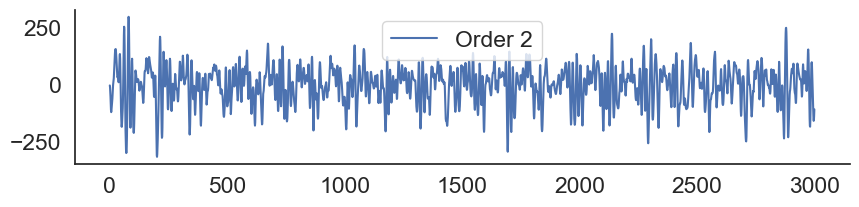

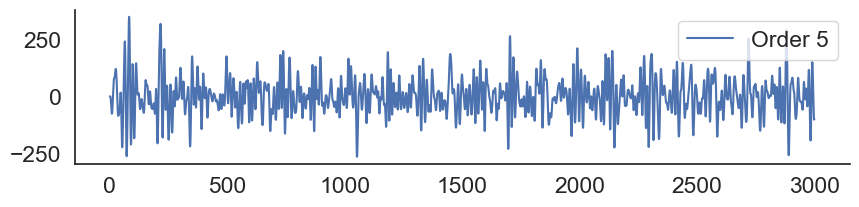

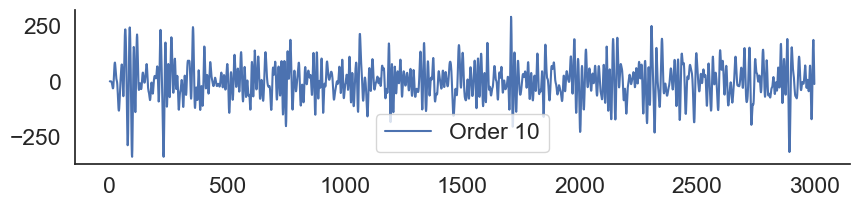

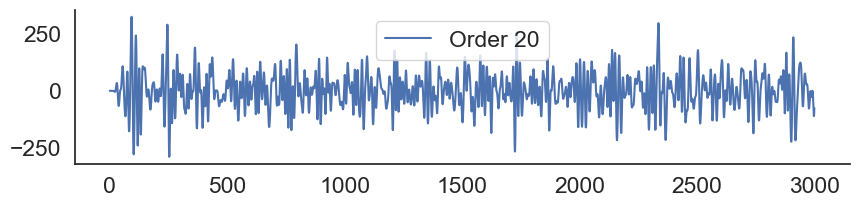

In [7]:
#trying different orders
t1_start = process_time()
filter1 = lf.bandpass_filter(lfp,low_f=10,high_f=100, sampling_rate=sampling_rate,filter_order=2)
t1_stop = process_time()

print("Elapsed time during the filtering in seconds:",
                                         t1_stop-t1_start)

plt.figure(figsize=(10,2))
plt.plot(filter1[:3000],label='Order 2')
plt.legend()

t2_start = process_time()
filter2 = lf.bandpass_filter(lfp,low_f=10,high_f=100, sampling_rate=sampling_rate,filter_order=5)
t2_stop = process_time()

print("Elapsed time during the filtering in seconds:",
                                         t2_stop-t2_start)

plt.figure(figsize=(10,2))
plt.plot(filter2[:3000],label='Order 5')
plt.legend()

t3_start = process_time()
filter3 = lf.bandpass_filter(lfp,low_f=10,high_f=100, sampling_rate=sampling_rate,filter_order=10)
t3_stop = process_time()

print("Elapsed time during the filtering in seconds:",
                                         t3_stop-t3_start)

plt.figure(figsize=(10,2))
plt.plot(filter3[:3000],label='Order 10')
plt.legend()

t4_start = process_time()
filter4 = lf.bandpass_filter(lfp,low_f=10,high_f=100, sampling_rate=sampling_rate,filter_order=20)
t4_stop = process_time()

print("Elapsed time during the filtering in seconds:",
                                         t4_stop-t4_start)

plt.figure(figsize=(10,2))
plt.plot(filter4[:3000],label='Order 20')
plt.legend()

### FPB comments
you can see a bit more of the low frequency components creeping in with order 2, which is to be expected because the filter frequency response becomes flatter

grade: 7

## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`
- Select a period of a few seconds of the signal and compute the spectrogram. 
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). this are all real wavelet.
- How does the spectrum look different from what we computed with a complex Morlet tranform ? Comment on why do you think this might be the case.

The most prominent difference between the complex and real valued wavelets, is that with the real valued wavelets, there seem to be points where the power value is zero. This is not the case with the complex valued morlet wavelet. This is probably caused by the fact that we are only plotting a power spectrum (and take the absolute value). If a real wavelet is used, it never has any imaginary components so at some places in time it will be zero (if the value is purely imaginary for example), periodically in fact.

In [9]:
#import data
from scipy import signal
from pywt import scale2frequency
from pywt import cwt
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
# sys.path.append('./code/')
import lfp_functions as lf

with open('../../AchimBrinkop/Neuro-Analysis/01-local_field_potential/data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


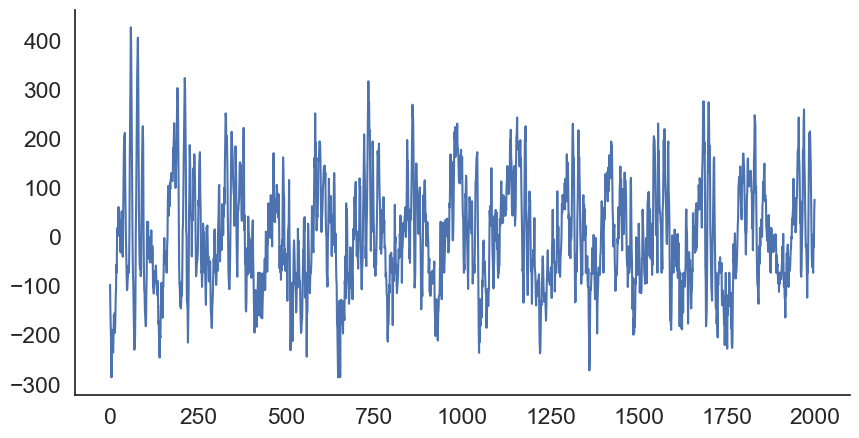

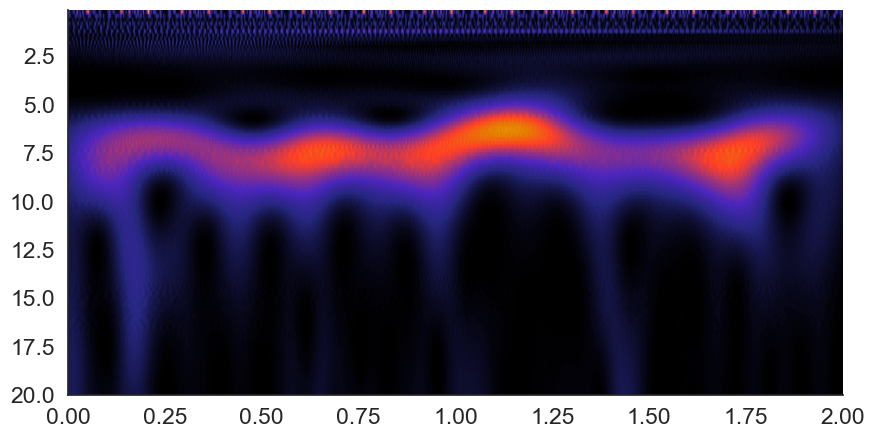

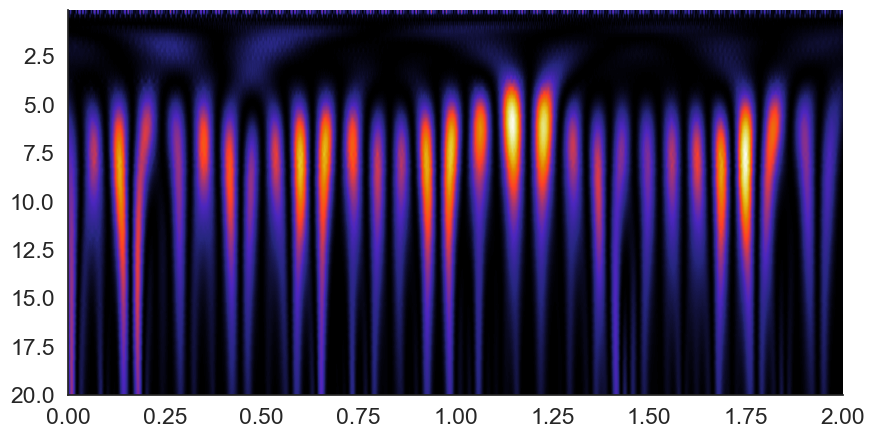

In [10]:
start = 0 #in seconds
end = 2 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)

#spectrogram with morlet transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'cmor1.0-1.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')

wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')


### FPB comments 
code is OK and the explanation is correct, you could have explored more wavelet types 
Grade: 7

## Exercise 3: REM sleep detection
---
Mammalian sleep is organized in different phases. [Rapid Eye Movement (REM) sleep](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep) is a well studied phase, with clear markers that make it detectable from LFP data. One of the most used marker is the ratio (or difference) between the oscillatory power in the theta and delta bands in the hippocampus. During REM sleep, the former dominates, in a pattern that resembles active behaviour.  
In this exercise we will use the tools we learned about to detect and inspect the REM and non-REM (nREM) phases of sleep in data recorded from the hippocampus of a sleeping mouse.

- Import the data form `data/moving_lfp.pickle`
- Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands, for the whole signal.
- z-score the two power signals (subtract the mean and divide by the standard deviation, you can use `scipy.stats.zscore()`)
- Compute and plot the power difference (`theta_power - delta_power`) for the sleep session.
- Compute the REM (power difference $>0.2$) and nREM (power diffewrence $<0.2$) sleep periods.
- Plot examples of REM vs nREM lfp signals (wideband filtered betw. 1 and 200 Hz to get rid of some of the noise).
- Explore how changing the threshold affects the amount of REM sleep detected.

## Answers

In [11]:
#import data
from scipy import signal
from scipy import stats
from pywt import scale2frequency
from pywt import cwt
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
sys.path.append('./code/')
import lfp_functions as lf

with open('../../AchimBrinkop/Neuro-Analysis/01-local_field_potential/data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


Now, I apply a wideband butterworth filter to get rid of some of the noise. Then I use the mexh (I tried also complex morlet but the difference is negligible) wavelet to get the power spectra of the lfp signal in the different frequency ranges and thus the power spectrum of the difference between the two.

Text(0, 0.5, 'power difference')

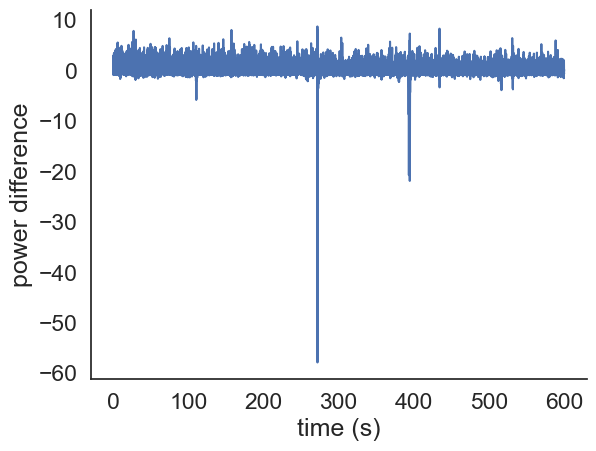

In [12]:
from scipy.signal import butter
from scipy.signal import sosfilt

start = 0 #in seconds
end = 600.133 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]

#wideband filtered signal (1-200Hz)

filter_order = 5
low_f = 1
high_f = 200

#define filter object
filter = butter(filter_order,[low_f,high_f],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
                
#apply filter to lfp       
wideband_lfp = sosfilt(filter, sig)

#theta
frequencies =  np.linspace(6,10,100)/sampling_rate
wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(wideband_lfp, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)

power_theta = np.mean(abs(cwtmatr)**2,axis=0)
power_theta = stats.zscore(power_theta)

#delta
frequencies =  np.linspace(2,4,50)/sampling_rate
wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(wideband_lfp, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)

power_delta = np.mean(abs(cwtmatr)**2,axis=0)
power_delta = stats.zscore(power_delta)

power_difference = power_theta - power_delta

power_difference

plt.figure()
plt.plot(np.linspace(start,end,len(power_difference)),power_difference)
plt.xlabel('time (s)')
plt.ylabel('power difference')

Now I use the function gaussian_filter1d, which averages the values of multiple frames to smoothen the function. It will now be easier to analyze the REM and nREM behaviour.

Text(0, 0.5, 'power difference')

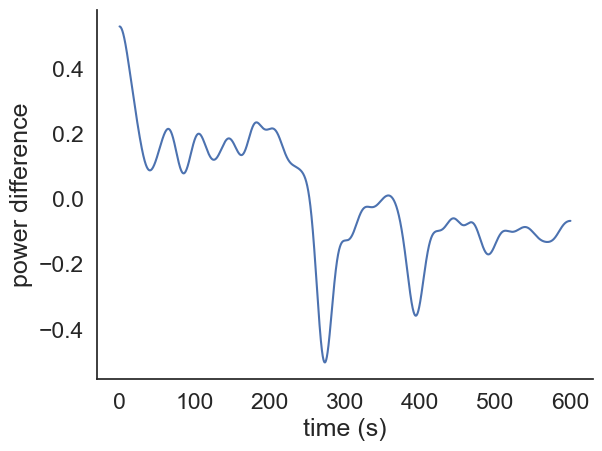

In [12]:
#Use a gaussian filter to smooth the function
from scipy.ndimage import gaussian_filter1d

power_difference_smooth = gaussian_filter1d(power_difference,10000)

plt.figure()
plt.plot(np.linspace(start,end,len(power_difference_smooth)),power_difference_smooth)
plt.xlabel('time (s)')
plt.ylabel('power difference')

Here I define a threshold dat determines when there is REM and nREM sleep.

In [13]:
c=0.2

REM = np.zeros(len(power_difference_smooth)) #initialize array with 1s and 0s to determine REM

for i in range(len(power_difference_smooth)):
    if power_difference_smooth[i]>= c:
        REM[i] = 1
        
        

Now, I determine the fraction of time that REM and nREM occurs. Changing c obviously affects the amount of REM sleep. Increasing the difference would result in a decrease in REM sleep. This can be seen in the graph below, the height of the horizontal line increases then. Everything above that line is REM sleep.

0.11967013978568083


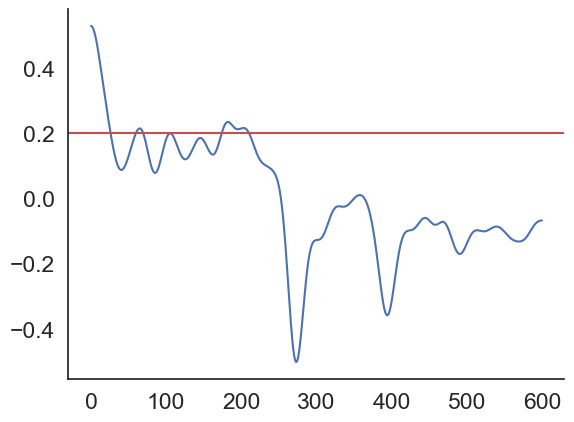

In [14]:
fracREM = np.sum(REM)/len(REM)
fracnREM = 1 - fracREM

print(fracREM)

#plot and check the result
fig, ax = plt.subplots()
ax.plot(np.linspace(start,end,len(power_difference_smooth)),power_difference_smooth)
ax.axhline(y=c, color='r')

### FPB comments 
the suggested criterion was that NREM is for `diff < 0.2` which is different from what you are doing here 

Lets plot the raw lfp signal for REM and nREM periods. In addition, let's look at the theta oscillations of both, since it is known that REM sleep has high power in theta oscillations.

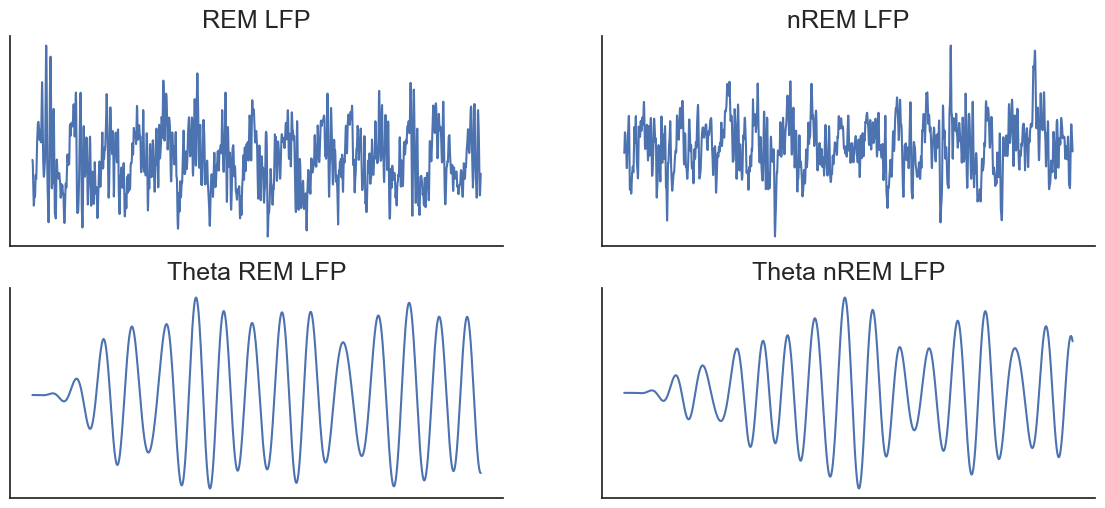

In [13]:
REMlfp = wideband_lfp[0:2000] #first 2 seconds of 1-200Hz filtered signal
nREMlfp = wideband_lfp[400000:402000]

filter_order = 5
low_f = 6
high_f = 10

#define filter object
filter = butter(filter_order,[low_f,high_f],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
                
#apply filter to lfp       
theta_REMlfp = sosfilt(filter, REMlfp)
theta_nREMlfp = sosfilt(filter, nREMlfp)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 6))
ax1.plot(REMlfp)
ax1.set_title('REM LFP')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.plot(nREMlfp)
ax2.set_title('nREM LFP')
ax2.set_xticks([])
ax2.set_yticks([])
ax3.plot(theta_REMlfp)
ax3.set_title('Theta REM LFP')
ax3.set_xticks([])
ax3.set_yticks([])
ax4.plot(theta_nREMlfp)
ax4.set_title('Theta nREM LFP')
ax4.set_xticks([])
ax4.set_yticks([])

# Show the plot
plt.show()

There is no clear difference between these graphs, unfortunately. This is probably due to the fact that the data is very noisy. One should expect differences in theta frequency and power between these 2 stages. Lets check the power spectra.

### FPB comments 
you start to see that there is less theta in NREM (it would have been more evident with the more stringent criterion that we suggested) 
grade: 7

Text(0.5, 1.0, 'Power Spectrum nREM')

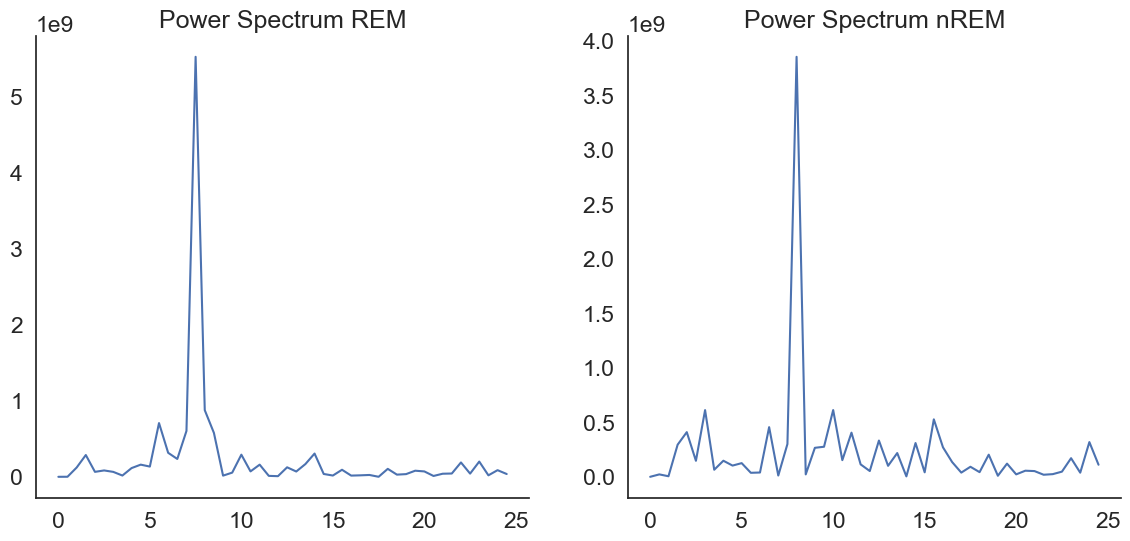

In [16]:
from scipy.fft import fft, fftfreq

n_samples = len(REMlfp)
sample_dt = 1. / sampling_rate

# we subtract the mean to get rid of the 0 frequency component in the spectrum
centered_REMlfp = REMlfp - np.mean(REMlfp)
centered_nREMlfp = nREMlfp - np.mean(nREMlfp)

transformed_REMsignal = fft(centered_REMlfp) 
transformed_nREMsignal = fft(centered_nREMlfp) 

frequencies = fftfreq(n_samples,sample_dt) 

transformed_REMsignal = transformed_REMsignal[:n_samples//2]
transformed_nREMsignal = transformed_nREMsignal[:n_samples//2]
frequencies = frequencies[:n_samples//2]

powerREM = abs(transformed_REMsignal)**2
powernREM = abs(transformed_nREMsignal)**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(frequencies[:50],powerREM[:50])
ax1.set_title('Power Spectrum REM')
ax2.plot(frequencies[:50],powernREM[:50])
ax2.set_title('Power Spectrum nREM')

Again, no clear difference in the theta range. However, the power is slightly higher for REM in the theta range, but this could be noise.